<a href="https://colab.research.google.com/github/claudioldc/MBA/blob/main/Exerc%C3%ADcio_Acompanhamento_Desafio_Mod1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as Bibliotecas

In [ ]:
import pandas as pd # Trabalhar com as tabelas e importação dos arquivos utilizados
import plotly.express as px # biblioteca para criar gráficos dinâmicos
import seaborn as sns # biblioteca para gráficos
import numpy as np # funções matemáticas de alto nível

Coletando Dados dos Estados Brasileiros

In [ ]:
estados = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding='latin-1')

In [ ]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


Coletando Dados da Idade de Clientes

In [ ]:
idade = pd.read_csv('idade_clientes.csv', sep = ';', encoding='latin-1')

In [ ]:
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


Colentado Dados de Clientes

In [ ]:
clientes = pd.read_excel('dados_pessoais.xlsx')

In [ ]:
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


Preparação dos Dados

Analisando as Variáveis das Bases de Dados

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [ ]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [ ]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [ ]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


Analisando Dados Ausentes

In [ ]:
#Verificando valores ausentes/nulos na base
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

#Verificando os registros com valores nulos

In [ ]:
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


Eliminando Dados Ausentes

In [ ]:
clientes.dropna(subset=['peso'], inplace=True) #para eliminar o registro

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

In [ ]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [ ]:
#Realizando a Média e a Mediana da Variável Peso
media = clientes.peso.mean()
mediana = clientes.peso.median()

In [ ]:
#Verificando os Valores
print(f"o valor da media dos pesos é:{media}\no valor da mediana é:{mediana}")

o valor da media dos pesos é:143.4409594095941
o valor da mediana é:140.0


In [ ]:
#Fazendo o arredondamento da variavel media
round(media,2)

143.44

In [ ]:
#Preencher os valores ausentes pela media
clientes.peso.fillna(round(media,2), inplace=True)

In [ ]:
#Verificar se existe algum valor ausente
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
clientes.count()

id_cliente    547
peso          547
colesterol    547
genero        547
id_estado     547
dtype: int64

Substituindo Variável Categórica

In [ ]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [ ]:
estados.pais.fillna('Brasil', inplace=True)

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

Analisando a Distribuição de Dados

In [ ]:
import matplotlib.pyplot as plt


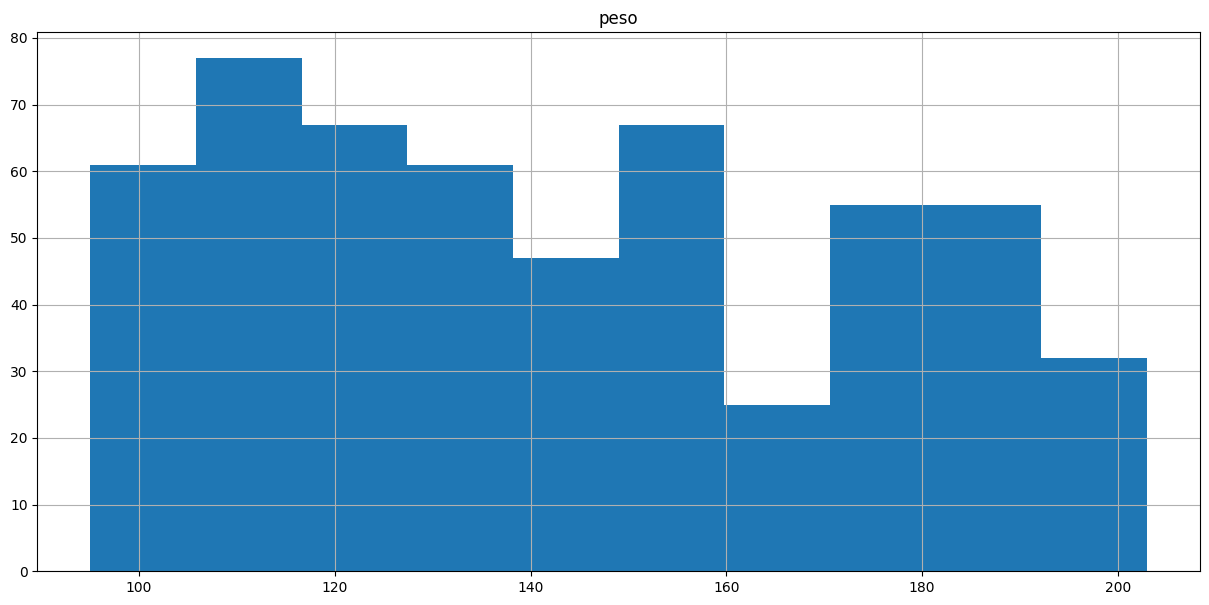

In [ ]:
clientes.hist(column='peso', figsize=(15,7))
plt.show()

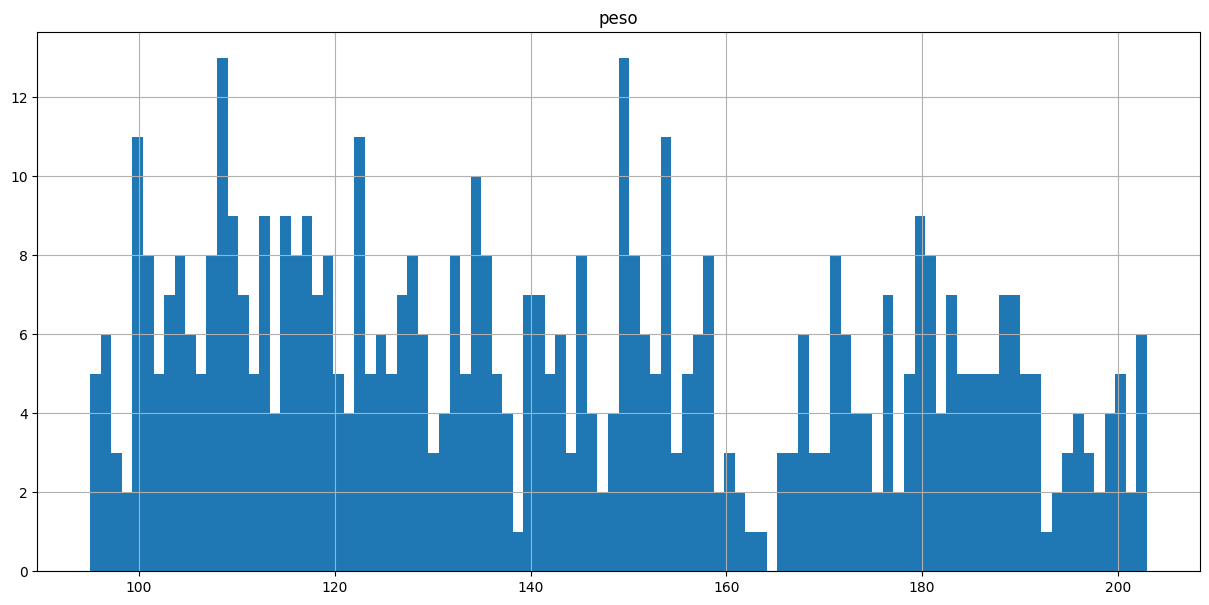

In [ ]:
clientes.hist(column='peso', figsize=(15,7), bins=100)
plt.show()

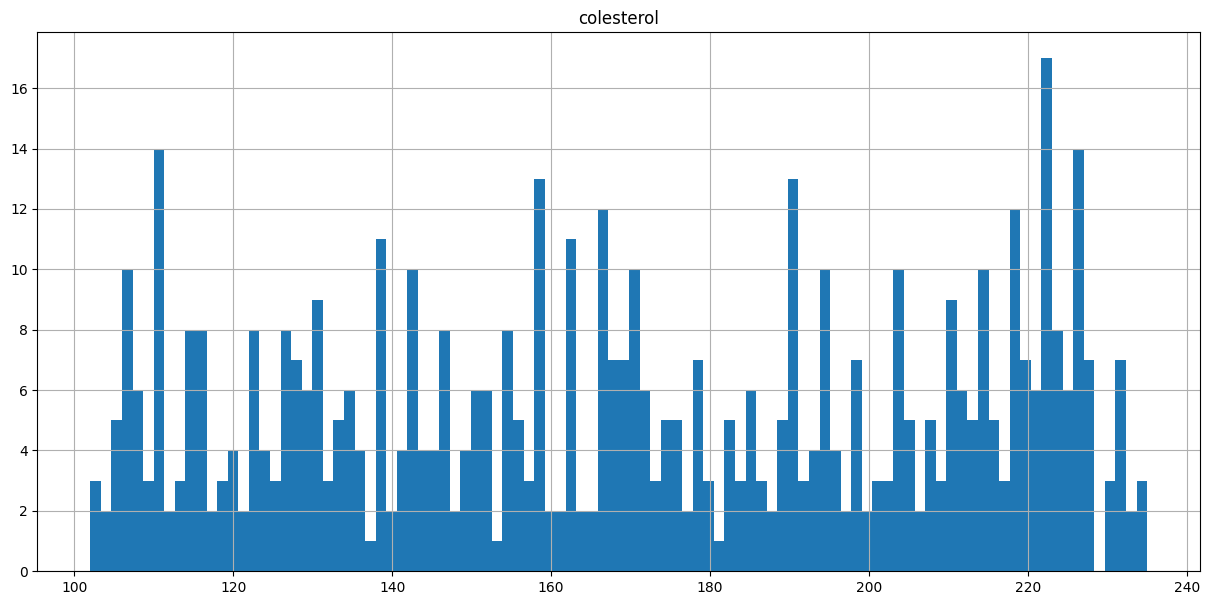

In [ ]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)
plt.show()

In [ ]:
#Criando um indentificador para a variável gênero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [ ]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


array([[<Axes: title={'center': 'genero_number'}>]], dtype=object)

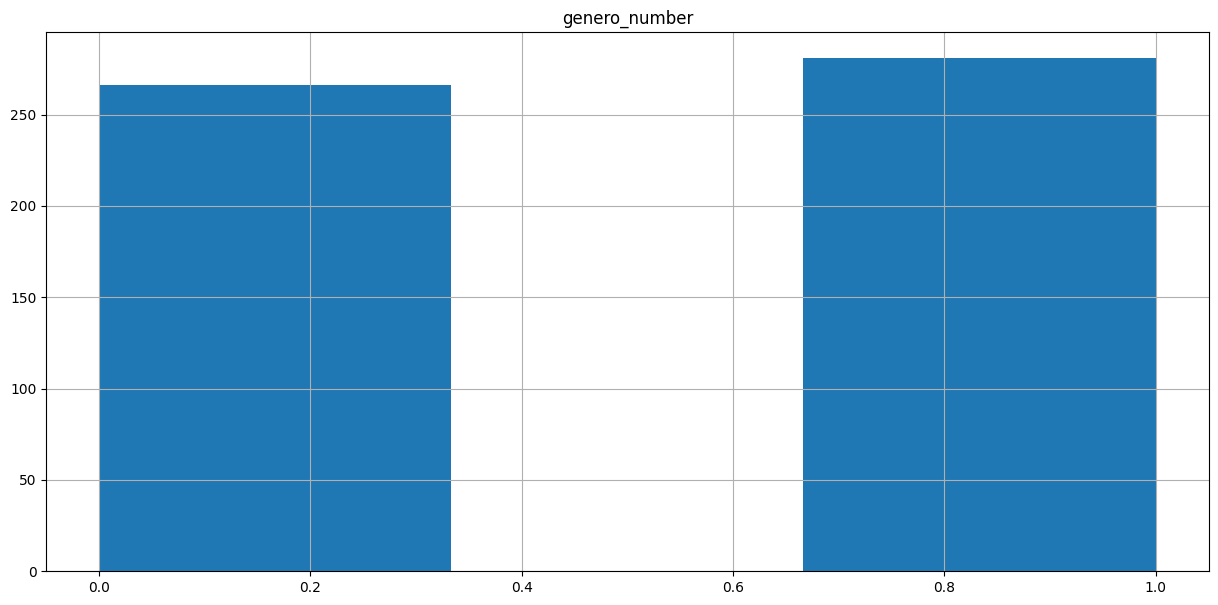

In [ ]:
clientes.hist(column='genero_number', figsize=(15,7), bins=3)

Junções Entre os Dados Coletados

In [ ]:
#Nessa etapa vamos realizar o merge entre os dados que realizamos a coleta

In [ ]:
estados[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [ ]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [ ]:
clientes_estados = pd.merge(clientes,estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
65,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
87,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
478,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
178,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [ ]:
#realiza junção entre clientes e idades
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [ ]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
65,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
87,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
478,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
178,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
543,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
544,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
545,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


Organizando a Base de Dados

In [ ]:
#Alterando o nome das colunas
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
65,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
87,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
478,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
178,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
#Alterando as linhas da variavel sigla_estado
base_completa.sigla_estado.str.upper()

0      RR
18     DF
40     AM
65     SC
87     SE
       ..
443    RO
478    AC
178    CE
396    RN
123    ES
Name: sigla_estado, Length: 547, dtype: object

In [ ]:
#Inserindo alteração realizada
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [ ]:
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
65,4,140.0,167,Feminino,24,0,Santa Catarina,SC,Brasil,55
87,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20
478,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66
178,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57


Alteração da Disposição das Colunas do Arquivo de Dados

In [ ]:
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
18,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
40,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
65,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
87,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
443,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
478,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
178,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
396,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


In [ ]:
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']].reset_index(drop=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
65,4,140.0,167,Feminino,24,0,Santa Catarina,SC,Brasil,55
87,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20
478,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66
178,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57


Análise de Dados
Para este trabalho, vamos realizar um agrupamento de pessoas baseado no colesterol, peso e idade das pessoas

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(dados_cliente)
        wcss.append(kmeans.inertia_)
    return wcss


In [ ]:
dados_cliente = base_completa [['peso', 'colesterol', 'idade']]
dados_cliente.head()

,peso,colesterol,idade
0,102.0,111,17
18,115.0,135,28
40,115.0,136,62
65,140.0,167,55
87,130.0,158,44


In [ ]:
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, n_init=10)  # Define explicitamente n_init
        kmeans.fit(dados_cliente)
        wcss.append(kmeans.inertia_)
    return wcss


In [ ]:
dados_cliente = base_completa [['peso', 'colesterol', 'idade']]
dados_cliente.head()

,peso,colesterol,idade
0,102.0,111,17
18,115.0,135,28
40,115.0,136,62
65,140.0,167,55
87,130.0,158,44


In [ ]:
type(wcss_clientes)

list

In [ ]:
# Visualizando os dados obtidos do WCSS
for i in range(len(wcss_clientes)):
    print(f'o cluster {i} possui valor de wcss de: {wcss_clientes[i]}')



o cluster 0 possui valor de wcss de: 1476678.1664643502
o cluster 1 possui valor de wcss de: 457970.4625118851
o cluster 2 possui valor de wcss de: 268077.2887419374
o cluster 3 possui valor de wcss de: 208867.21653927903
o cluster 4 possui valor de wcss de: 180612.48241426525
o cluster 5 possui valor de wcss de: 155839.8546059188
o cluster 6 possui valor de wcss de: 131228.93931422092
o cluster 7 possui valor de wcss de: 111030.51080902261
o cluster 8 possui valor de wcss de: 95534.23957914734
o cluster 9 possui valor de wcss de: 84865.63193425402


Visualizando o Gráfico do Cotovelo

In [ ]:
import plotly.express as px #Criação de gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objects as go #Criação e concatenização de gráficos

In [ ]:
grafico_wcss = px.line( x=range(1,11),
                      y=wcss_clientes
                      )
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o Wcss',
                  xaxis_title= 'Número de Clusters',
                  yaxis_title= 'Valor do Wcss',
                  template= 'plotly_white'
                  )

fig.show()

In [ ]:
kmeans_clientes = KMeans(n_clusters=3, n_init=10, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)


In [ ]:
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade,cluster
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17,1
18,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28,1
40,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62,1
65,4,140.0,167,Feminino,24,0,Santa Catarina,SC,Brasil,55,2
87,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44,2
...,...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20,0
478,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66,2
178,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36,1
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57,1


Calculando os Centroides de Cada Cluster

In [ ]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[181.96141176, 217.07647059,  42.69411765],
       [110.25      , 125.62765957,  43.5212766 ],
       [141.80825397, 173.04761905,  42.15343915]])

In [ ]:
grafico = px.scatter(x = base_completa['peso'],
                     y = base_completa['colesterol'],
                     color= base_completa['cluster'])

grafico_centroide = px.scatter(x= centroides_clusters[:,0], y= centroides_clusters[:,1], size = [7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

Visualizando e Alterando layout do gráfico

In [ ]:
grafico = px.scatter(x = base_completa['colesterol'],
                     y = base_completa['peso'],
                     color= base_completa['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title= 'Análise de Clusters',
                  xaxis_title= 'Colesterol',
                  yaxis_title= 'Peso'
                  )

fig.show()


Criando Funções para Gerar Gráficos

In [ ]:
def plotar_grafico(x,y, xlabel, y_label):
  grafico= px.scatter(x = x,
                     y = y,
                     color= base_completa['cluster'])

  fig = go.Figure(grafico)

  fig.update_layout(title= 'Análise de Clusters',
                    xaxis_title = xlabel,
                    yaxis_title = y_label,
                    )
  fig.show()

In [ ]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [ ]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

In [ ]:
plotar_grafico(base_completa['idade'], base_completa['colesterol'], 'idade', 'colesterol')

Segmentando os clientes baseado na análise dos clusters

In [ ]:
x = 'colesterol'
y = 'peso'
plotar_grafico(base_completa[x], base_completa[y], x,y)

In [ ]:
cluster_clientes = base_completa

In [ ]:
#Segmentando os clientes baseado na análise de clusters
cluster_clientes.loc[cluster_clientes['cluster']==0, 'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==2, 'nome_cluster'] = 'Médio Risco'
cluster_clientes.loc[cluster_clientes['cluster']==1, 'nome_cluster'] = 'Baixo Risco'

In [ ]:
cluster_clientes

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade,cluster,nome_cluster
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17,1,Baixo Risco
18,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28,1,Baixo Risco
40,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62,1,Baixo Risco
65,4,140.0,167,Feminino,24,0,Santa Catarina,SC,Brasil,55,2,Médio Risco
87,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44,2,Médio Risco
...,...,...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20,0,Alto Risco
478,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66,2,Médio Risco
178,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36,1,Baixo Risco
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57,1,Baixo Risco


Análise dos Clusters Criados

In [ ]:
#Verificando os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,170.0,42.694118,15.231564,16.0,31.0,43.0,55.75,69.0
Baixo Risco,188.0,43.521277,15.009251,17.0,31.0,42.0,57.00,70.0
Médio Risco,189.0,42.153439,15.294024,16.0,29.0,42.0,54.00,70.0


In [ ]:
#Verificando os valores de estado por cluster
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,170,27,Rio Grande do Sul,10
Baixo Risco,188,27,Amazonas,13
Médio Risco,189,27,Mato Grosso do Sul,13


In [ ]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Rio Grande do Sul"')


,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade,cluster,nome_cluster
354,69,187.0,221,Feminino,21,0,Rio Grande do Sul,RS,Brasil,35,0,Alto Risco
356,106,179.0,216,Masculino,21,1,Rio Grande do Sul,RS,Brasil,56,0,Alto Risco
361,261,171.0,205,Masculino,21,1,Rio Grande do Sul,RS,Brasil,34,0,Alto Risco
364,313,169.0,204,Masculino,21,1,Rio Grande do Sul,RS,Brasil,33,0,Alto Risco
365,335,182.0,222,Masculino,21,1,Rio Grande do Sul,RS,Brasil,68,0,Alto Risco
366,373,194.0,224,Feminino,21,0,Rio Grande do Sul,RS,Brasil,38,0,Alto Risco
367,374,177.0,214,Masculino,21,1,Rio Grande do Sul,RS,Brasil,18,0,Alto Risco
368,376,172.0,205,Masculino,21,1,Rio Grande do Sul,RS,Brasil,50,0,Alto Risco
369,403,175.0,215,Feminino,21,0,Rio Grande do Sul,RS,Brasil,45,0,Alto Risco
370,409,180.0,219,Masculino,21,1,Rio Grande do Sul,RS,Brasil,19,0,Alto Risco


In [ ]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['peso'].describe()

count        mean        std     min    25%     50%  \
nome_cluster genero                                                           
Alto Risco   Feminino    71.0  182.823099  11.441636  143.44  178.0  185.00   
             Masculino   99.0  181.343434  11.701353  159.00  172.0  180.00   
Baixo Risco  Feminino    84.0  111.166667   7.829252   96.00  107.0  112.00   
             Masculino  104.0  109.509615   8.139554   95.00  103.0  108.00   
Médio Risco  Feminino   111.0  142.193153  10.351079  124.00  134.0  141.00   
             Masculino   78.0  141.260513  10.220661  124.00  132.0  143.72   

                           75%    max  
nome_cluster genero                    
Alto Risco   Feminino   191.00  203.0  
             Masculino  188.00  203.0  
Baixo Risco  Feminino   117.00  126.0  
             Masculino  117.00  126.0  
Médio Risco  Feminino   152.50  159.0  
             Masculino  150.75  157.0

In [ ]:
cluster_clientes.to_csv('Classificação Clientes.csv', sep = ';', encoding = 'latin1')